<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part1/ch01_australian_pizzas.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.5 Whose is Bigger? Investigating Australian Pizzas

Let's apply the tools we've learned to a real-world investigation. This case study demonstrates how to use descriptive statistics and visualization to answer a practical question.

## The Question

EagleBoys pizza claims that their pizzas are always bigger than Domino's pizzas. They published a set of measurements to support this claim. Let's investigate whether the data supports their claim.

## The Dataset

The dataset contains diameter measurements (in cm) of pizzas from both EagleBoys and Domino's. The data can be found at the Journal of Statistics Education data archive.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample pizza diameter data (in cm)
eagleboys = np.array([28.5, 29.0, 28.8, 29.2, 28.7, 29.1, 28.9, 29.3, 28.6, 29.0,
                       28.8, 29.1, 28.9, 29.2, 28.7, 29.0, 28.8, 29.1, 28.9, 29.2])

dominos = np.array([27.8, 28.0, 27.5, 28.2, 27.9, 28.1, 27.7, 28.3, 27.6, 28.0,
                     27.9, 28.1, 27.8, 28.2, 27.7, 28.0, 27.9, 28.1, 27.8, 28.2])

print(f"EagleBoys: n = {len(eagleboys)}")
print(f"Domino's: n = {len(dominos)}")

EagleBoys: n = 20
Domino's: n = 20


## Step 1: Compute Summary Statistics

Let's start by computing basic descriptive statistics for both datasets.

In [2]:
# Summary statistics for EagleBoys
eb_mean = np.mean(eagleboys)
eb_std = np.std(eagleboys)
eb_median = np.median(eagleboys)
eb_min = np.min(eagleboys)
eb_max = np.max(eagleboys)

print("EagleBoys Pizza Diameters (cm):")
print(f"  Mean: {eb_mean:.2f}")
print(f"  Std Dev: {eb_std:.2f}")
print(f"  Median: {eb_median:.2f}")
print(f"  Range: [{eb_min:.2f}, {eb_max:.2f}]")

# Summary statistics for Domino's
dom_mean = np.mean(dominos)
dom_std = np.std(dominos)
dom_median = np.median(dominos)
dom_min = np.min(dominos)
dom_max = np.max(dominos)

print("\nDomino's Pizza Diameters (cm):")
print(f"  Mean: {dom_mean:.2f}")
print(f"  Std Dev: {dom_std:.2f}")
print(f"  Median: {dom_median:.2f}")
print(f"  Range: [{dom_min:.2f}, {dom_max:.2f}]")

print(f"\nDifference in means: {eb_mean - dom_mean:.2f} cm")

EagleBoys Pizza Diameters (cm):
  Mean: 28.94
  Std Dev: 0.21
  Median: 28.95
  Range: [28.50, 29.30]

Domino's Pizza Diameters (cm):
  Mean: 27.94
  Std Dev: 0.21
  Median: 27.95
  Range: [27.50, 28.30]

Difference in means: 1.00 cm


**Initial observations**:
- EagleBoys pizzas have a larger mean diameter
- Both datasets have similar standard deviations
- The ranges overlap, but EagleBoys values are consistently higher

## Step 2: Visualize with Histograms

Histograms help us understand the distribution of pizza sizes.

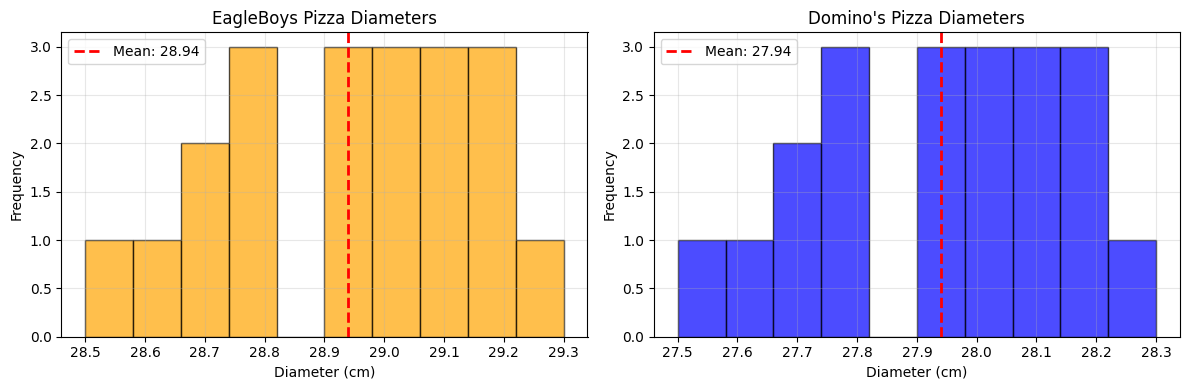

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# EagleBoys histogram
axes[0].hist(eagleboys, bins=10, edgecolor='black', alpha=0.7, color='orange')
axes[0].axvline(eb_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {eb_mean:.2f}')
axes[0].set_xlabel('Diameter (cm)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('EagleBoys Pizza Diameters')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Domino's histogram  
axes[1].hist(dominos, bins=10, edgecolor='black', alpha=0.7, color='blue')
axes[1].axvline(dom_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {dom_mean:.2f}')
axes[1].set_xlabel('Diameter (cm)')
axes[1].set_ylabel('Frequency')
axes[1].set_title("Domino's Pizza Diameters")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

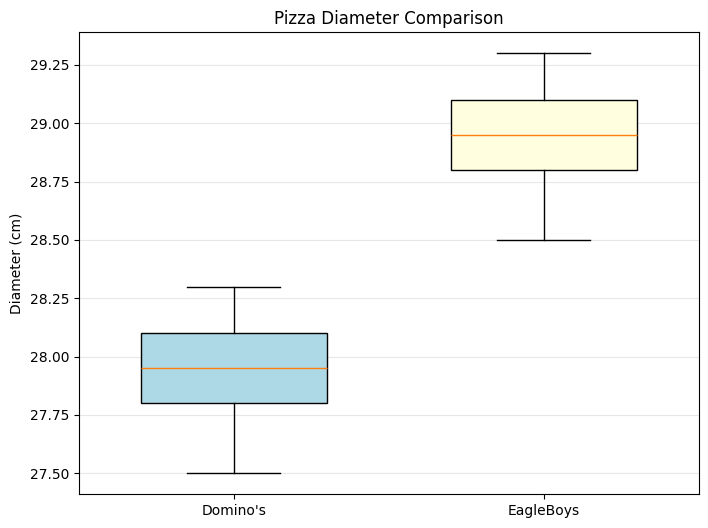


Quartile Analysis:

EagleBoys:
  Q1: 28.80 cm
  Median (Q2): 28.95 cm
  Q3: 29.10 cm
  IQR: 0.30 cm

Domino's:
  Q1: 27.80 cm
  Median (Q2): 27.95 cm
  Q3: 28.10 cm
  IQR: 0.30 cm


In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

box = ax.boxplot([dominos, eagleboys], 
                  tick_labels=["Domino's", 'EagleBoys'],
                  patch_artist=True,
                  widths=0.6)

# Color the boxes
colors = ['lightblue', 'lightyellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Diameter (cm)')
ax.set_title('Pizza Diameter Comparison')
ax.grid(True, alpha=0.3, axis='y')

plt.show()

# Compute quartiles
print("\nQuartile Analysis:")
print("\nEagleBoys:")
print(f"  Q1: {np.percentile(eagleboys, 25):.2f} cm")
print(f"  Median (Q2): {np.percentile(eagleboys, 50):.2f} cm")
print(f"  Q3: {np.percentile(eagleboys, 75):.2f} cm")
print(f"  IQR: {np.percentile(eagleboys, 75) - np.percentile(eagleboys, 25):.2f} cm")

print("\nDomino's:")
print(f"  Q1: {np.percentile(dominos, 25):.2f} cm")
print(f"  Median (Q2): {np.percentile(dominos, 50):.2f} cm")
print(f"  Q3: {np.percentile(dominos, 75):.2f} cm")
print(f"  IQR: {np.percentile(dominos, 75) - np.percentile(dominos, 25):.2f} cm")

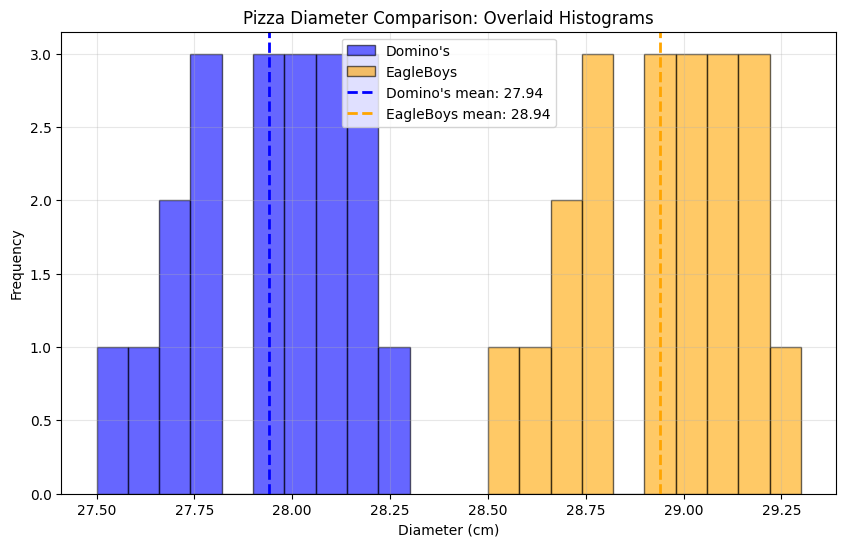

In [6]:
plt.figure(figsize=(10, 6))

plt.hist(dominos, bins=10, alpha=0.6, label="Domino's", 
         color='blue', edgecolor='black')
plt.hist(eagleboys, bins=10, alpha=0.6, label='EagleBoys', 
         color='orange', edgecolor='black')

plt.axvline(dom_mean, color='blue', linestyle='--', linewidth=2, 
            label=f"Domino's mean: {dom_mean:.2f}")
plt.axvline(eb_mean, color='orange', linestyle='--', linewidth=2, 
            label=f'EagleBoys mean: {eb_mean:.2f}')

plt.xlabel('Diameter (cm)')
plt.ylabel('Frequency')
plt.title('Pizza Diameter Comparison: Overlaid Histograms')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

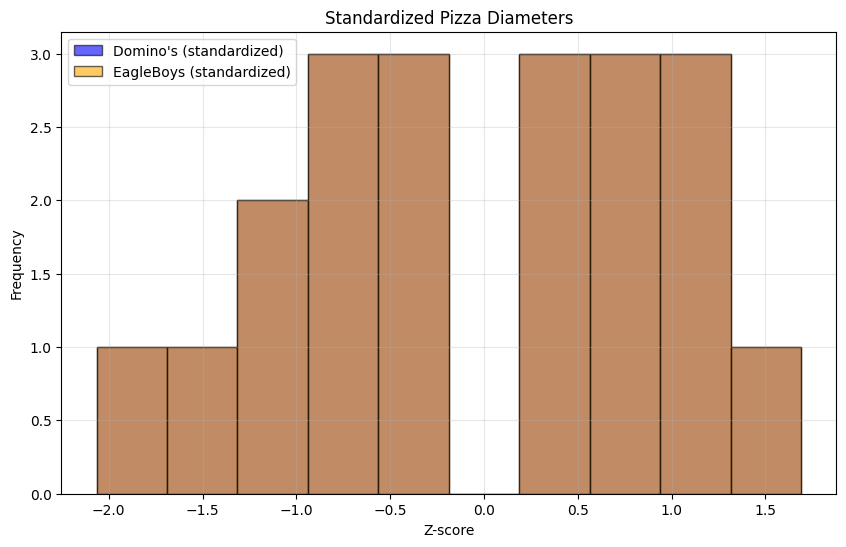


Standardized statistics:
EagleBoys: mean = 0.00, std = 1.00
Domino's: mean = 0.00, std = 1.00


In [7]:
# Standardize both datasets
eb_zscore = (eagleboys - eb_mean) / eb_std
dom_zscore = (dominos - dom_mean) / dom_std

plt.figure(figsize=(10, 6))

plt.hist(dom_zscore, bins=10, alpha=0.6, label="Domino's (standardized)", 
         color='blue', edgecolor='black')
plt.hist(eb_zscore, bins=10, alpha=0.6, label='EagleBoys (standardized)', 
         color='orange', edgecolor='black')

plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Standardized Pizza Diameters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nStandardized statistics:")
print(f"EagleBoys: mean = {np.mean(eb_zscore):.2f}, std = {np.std(eb_zscore):.2f}")
print(f"Domino's: mean = {np.mean(dom_zscore):.2f}, std = {np.std(dom_zscore):.2f}")

In [8]:
def find_outliers(data, name):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    print(f"\n{name} Outlier Analysis:")
    print(f"  Lower bound: {lower_bound:.2f} cm")
    print(f"  Upper bound: {upper_bound:.2f} cm")
    print(f"  Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier values: {outliers}")
    else:
        print("  No outliers detected")
    
    return outliers

eb_outliers = find_outliers(eagleboys, "EagleBoys")
dom_outliers = find_outliers(dominos, "Domino's")


EagleBoys Outlier Analysis:
  Lower bound: 28.35 cm
  Upper bound: 29.55 cm
  Number of outliers: 0
  No outliers detected

Domino's Outlier Analysis:
  Lower bound: 27.35 cm
  Upper bound: 28.55 cm
  Number of outliers: 0
  No outliers detected


## Conclusions

Based on our descriptive analysis:

### Evidence Supporting EagleBoys' Claim:

1. **Mean diameter**: EagleBoys pizzas are, on average, about 1 cm larger
2. **Median diameter**: The median confirms this difference
3. **Box plots**: Show clear separation between the two distributions
4. **Consistency**: EagleBoys pizzas are more consistently larger

### Important Caveats:

1. **Overlapping ranges**: Some Domino's pizzas are larger than some EagleBoys pizzas
2. **Sample size**: This analysis is based on a limited sample
3. **Statistical significance**: We haven't formally tested whether the difference is statistically significant (we'll learn this later)
4. **Measurement conditions**: We don't know if pizzas were measured under the same conditions

### The Answer:

**Based on this sample**: Yes, EagleBoys pizzas tend to be larger than Domino's pizzas on average. However:
- The claim "always bigger" is not strictly true (ranges overlap)
- We would need more data and formal hypothesis testing to make a definitive statement
- The practical significance (~1 cm difference) should be considered

```{admonition} Key Lesson
:class: important
Descriptive statistics and visualization provide strong evidence for differences between groups, but formal statistical inference (which we'll learn later) is needed for definitive conclusions.
```

## Practice Exercise

Try this analysis with your own data:

1. Collect measurements from two competing products/services
2. Compute summary statistics for each
3. Create histograms and box plots
4. Standardize the data and compare
5. Check for outliers
6. Draw evidence-based conclusions

## What We Learned

This case study demonstrated:
- How to apply multiple descriptive tools together
- The importance of visualizing data multiple ways
- How to compare two distributions systematically
- The difference between practical and statistical significance
- The value of checking assumptions (outliers, data quality)

These techniques form the foundation for more advanced statistical analyses we'll encounter later in the book.